# Exploratory Data Analysis (D207-PA)

#### QUESTION: Which independent variables are associated with re-admission?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('/Users/secil/Documents/WGU-MSDA/D207-ExploratoryDA/cleaned_medicaldata/medical_clean.csv')
pd.set_option('display.max_columns', None)

In [25]:
#df.head(3)

In [4]:
df.shape

(10000, 50)

In [26]:
#df.columns

In [6]:
#df.isnull().sum()

In [7]:
# Dropping the columns I will not be conducting a test on
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area',
       'TimeZone','Job'], axis=1)
df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

## Data Exploration

In [8]:
# Find the data types for each variable
#df.dtypes

In [9]:
# Find the number of unique values for each column
#df.nunique()

## Chi-square tests

In [10]:
df['Initial_days_int']=df['Initial_days'].astype(int)
df['Initial_days_int'].describe()

count    10000.000000
mean        33.956000
std         26.301628
min          1.000000
25%          7.000000
50%         35.500000
75%         61.000000
max         71.000000
Name: Initial_days_int, dtype: float64

In [11]:
#** some code is copied from this source: https://www.absentdata.com/pandas/pandas-cut-continuous-to-categorical/

df['Initial_days_cat'] = df['Initial_days']
df['Initial_days_cat']=pd.cut(df['Initial_days_cat'], bins=[0,10,30,60,72], 
                              labels=['0-10 days','10-30 days','30-60 days','60-72 days'])

In [12]:
ct = pd.crosstab(df['Initial_days_cat'],df['ReAdmis'])#, margins=True  -> gives the total
print(ct)

ReAdmis             No   Yes
Initial_days_cat            
0-10 days         3091     0
10-30 days        1888     0
30-60 days        1352   971
60-72 days           0  2698


In [13]:
alpha=0.05
chi2, p, dof, expected = stats.chi2_contingency(ct)
print(f"statistic: {chi2}\np-value: {p}\ndegrees of freedom: {dof}\nexpected: {expected}\n")
if p < alpha:
    print('Readmission is dependent on Initial days (reject H0)')
else:
    print('Readmission is independent of Initial days (fail to reject H0)')

statistic: 7567.0863982051205
p-value: 0.0
degrees of freedom: 3
expected: [[1956.9121 1134.0879]
 [1195.2928  692.7072]
 [1470.6913  852.3087]
 [1708.1038  989.8962]]

Readmission is dependent on Initial days (reject H0)


In [14]:
ct2 = pd.crosstab(df['Services'],df['ReAdmis'])
print(ct2)

ReAdmis        No   Yes
Services               
Blood Work   3335  1930
CT Scan       737   488
Intravenous  2027  1103
MRI           232   148


In [15]:
alpha=0.05
chi2, p, dof, expected = stats.chi2_contingency(ct2)
print(f"statistic: {chi2}\np-value: {p}\ndegrees of freedom: {dof}\nexpected: {expected}\n")
if p < alpha:
    print('Readmission is dependent on Services (reject H0)')
else:
    print('Readmission is independent of Services (fail to reject H0)')

statistic: 8.892645054628435
p-value: 0.03075281113212747
degrees of freedom: 3
expected: [[3333.2715 1931.7285]
 [ 775.5475  449.4525]
 [1981.603  1148.397 ]
 [ 240.578   139.422 ]]

Readmission is dependent on Services (reject H0)


## Univariate Statistics and Distributions 

#### Continous Variables

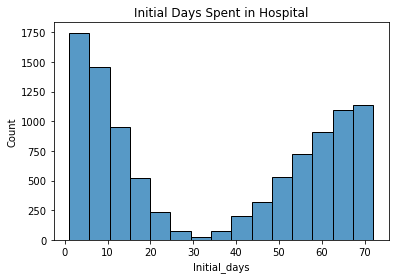

In [16]:
sns.histplot(data=df, x='Initial_days')
plt.title('Initial Days Spent in Hospital');
plt.savefig('Initial_days.png')

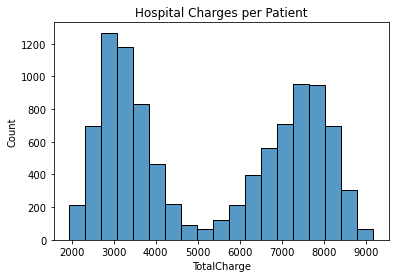

In [17]:
sns.histplot(data=df, x='TotalCharge')
plt.title('Hospital Charges per Patient');
plt.savefig('TotalCharge.png')

#### Categorical Variables

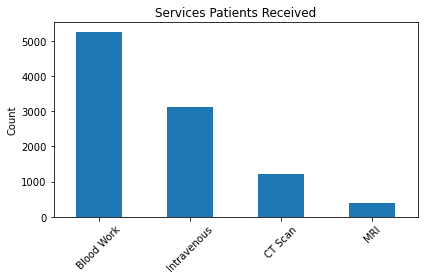

In [18]:
df['Services'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.title('Services Patients Received')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Services.png');

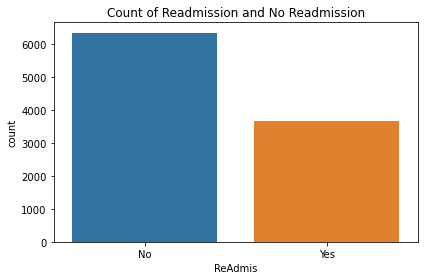

In [19]:
sns.countplot(data=df,x='ReAdmis')
plt.title('Count of Readmission and No Readmission')
plt.tight_layout()
plt.savefig('Readmission.png');

## Bivariate Statistics and Distributions 

#### Continous

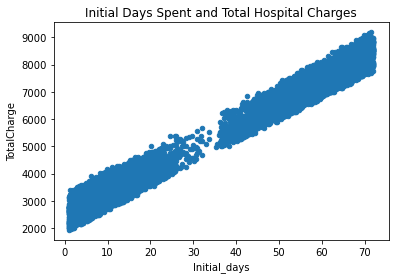

In [20]:
df.plot(x='Initial_days',y='TotalCharge', kind='scatter')
plt.title('Initial Days Spent and Total Hospital Charges')
plt.savefig('Days_Charges.png');

#### Categorical

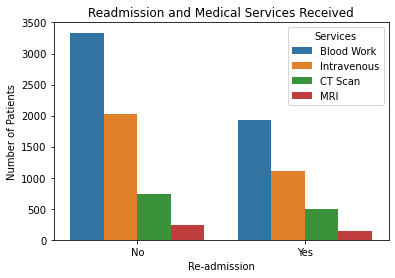

In [21]:
sns.countplot(data=df, x='ReAdmis', hue='Services')
plt.title('Readmission and Medical Services Received')
plt.xlabel('Re-admission')
plt.ylabel('Number of Patients');
plt.savefig('Readmis_Services.png')

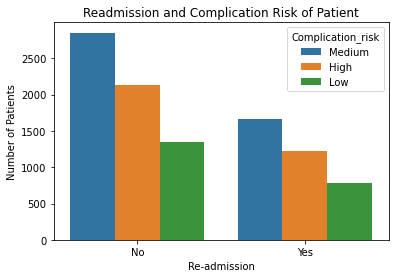

In [22]:
sns.countplot(data=df, x='ReAdmis', hue='Complication_risk')
plt.title('Readmission and Complication Risk of Patient')
plt.xlabel('Re-admission')
plt.ylabel('Number of Patients');
plt.savefig('Readmis_Comp.png')

#### Continous and Categorical variables

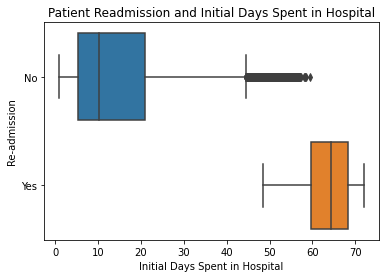

In [23]:
sns.boxplot(x='Initial_days', y='ReAdmis',data=df)
plt.title('Patient Readmission and Initial Days Spent in Hospital')
plt.xlabel('Initial Days Spent in Hospital')
plt.ylabel('Re-admission');
plt.savefig('days_admis.png')

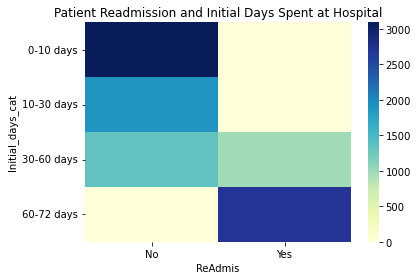

In [24]:
sns.heatmap(ct, cmap='YlGnBu');
plt.title('Patient Readmission and Initial Days Spent at Hospital')
plt.tight_layout();
plt.savefig('Heatmap_readmisdays.png')